# SHAI_Bootcamp_Assignment

In [1]:
#loading The dataset

import pandas as pd

employee=pd.read_csv('.\Salaries.csv')
employee.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


## 1.Basic Data Exploration

In [2]:
# Number of rows and columns in the dataset:

print('Number of rows: ',employee.shape[0])
print('Number of columns: ',employee.shape[1])

#Information about each column name, Number of missing values:

employee.info()

Number of rows:  148654
Number of columns:  13
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


Note that columns Basepay, OvertimePay, OtherPay, Benifits, Notes, Status has missing values

## 2.Descriptive Statistics

In [3]:
desc_stat=employee['TotalPay'].describe()
print('descriptive statistics for TotalPay column: ')
desc_stat 

descriptive statistics for TotalPay column: 


count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64

In [4]:
print('Mean of TotalPay: ',desc_stat['mean'])
print('Median of TotalPay: ',desc_stat['50%'])
print('Standard Deviation of TotalPay: ',desc_stat['std'] )
print('Minimum Value of TotalPay: ',desc_stat['min'] )
print('Maximum value of TotalPay: ',desc_stat['max'] )
print('Range of TotalPay: ',desc_stat['max']-desc_stat['min'] )
mode=employee['TotalPay'].mode()
print('Mode of TotalPay: ')
mode

Mean of TotalPay:  74768.32197169267
Median of TotalPay:  71426.60999999999
Standard Deviation of TotalPay:  50517.005273949944
Minimum Value of TotalPay:  -618.13
Maximum value of TotalPay:  567595.43
Range of TotalPay:  568213.56
Mode of TotalPay: 


0    0.0
Name: TotalPay, dtype: float64

## 3.Data Cleaning

In [5]:

#Dropping rows with missing values in one of the columns OvertimePay and OtherPay, as each of them has only 4 missing values:
employee_after=employee.dropna(subset=['OvertimePay','OtherPay'])

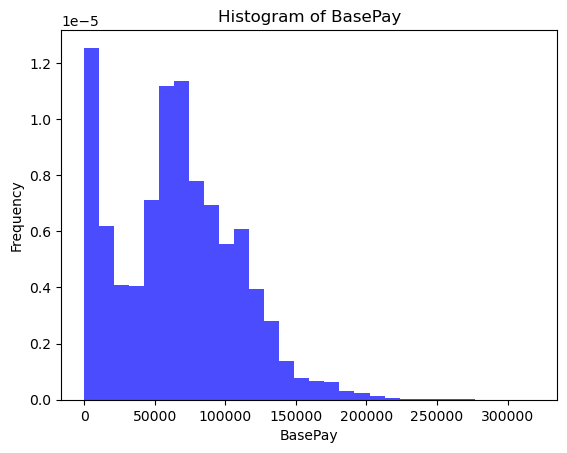

In [6]:
#Checking the distribution of the values of the BasePay column, as there is a 604 missing values, we will impute them
#with a specific value, to decide if the value will be the mean, mode, or the median, we will check the distribution using histogram

import matplotlib.pyplot as plt

plt.hist(employee_after['BasePay'], bins=30, density=True, alpha=0.7, color='blue')
plt.title('Histogram of BasePay')
plt.xlabel('BasePay')
plt.ylabel('Frequency')
plt.show()

Note that the distribution is not normal but positively skewed, so we will not use the median or the mean, instead, we will use the mode (most accured value).

In [7]:
#imputation with the mode
mode_value = employee_after['BasePay'].mode().iloc[0]
employee_after['BasePay'].fillna(mode_value,inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_1568\1105299518.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employee_after['BasePay'].fillna(mode_value,inplace=True)


In [8]:
employee_after.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148650 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148650 non-null  int64  
 1   EmployeeName      148650 non-null  object 
 2   JobTitle          148650 non-null  object 
 3   BasePay           148650 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148650 non-null  float64
 8   TotalPayBenefits  148650 non-null  float64
 9   Year              148650 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148650 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 15.9+ MB


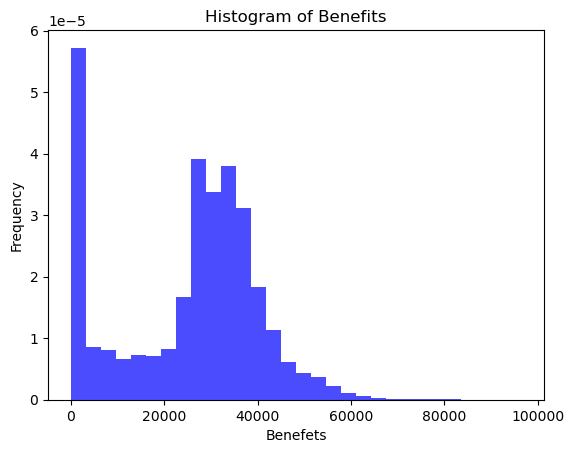

In [9]:
import matplotlib.pyplot as plt

plt.hist(employee_after['Benefits'], bins=30, density=True, alpha=0.7, color='blue')
plt.title('Histogram of Benefits')
plt.xlabel('Benefets')
plt.ylabel('Frequency')
plt.show()

Note that the histogram is normally distributed, so we will use Imputation with median to handle missing values rather than the mean because it's less sensitive to extreme outliers (zero value in our case).

In [10]:
#Imputation with median

median=employee_after['Benefits'].median()
employee_after['Benefits'].fillna(median,inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_1568\1573189763.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employee_after['Benefits'].fillna(median,inplace=True)


In [11]:
#Both the Notes and the Status columns has no values, so we will delete them

employee_cleaned=employee_after.drop(columns=['Notes','Status'])

In [12]:
employee_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148650 entries, 0 to 148653
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148650 non-null  int64  
 1   EmployeeName      148650 non-null  object 
 2   JobTitle          148650 non-null  object 
 3   BasePay           148650 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          148650 non-null  float64
 7   TotalPay          148650 non-null  float64
 8   TotalPayBenefits  148650 non-null  float64
 9   Year              148650 non-null  int64  
 10  Agency            148650 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 13.6+ MB


## 4.Basic Data Visualization

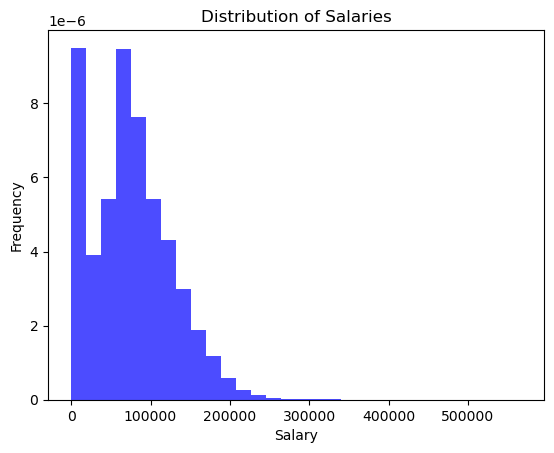

In [14]:
#creating histogram for the salary (TotalPay) attribute:

plt.hist(employee_cleaned['TotalPay'],bins=30,density=True,alpha=0.7,color='blue')
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

In [44]:
#using pie charts to represent the proportion of employees in different departments.
#since the departments names are embeded within the JobTitle column, we need to extract it first to a different column:

import re

employee_cleaned['department']=employee_cleaned['JobTitle'].str.extract(r'\((.*?)\)', flags=re.IGNORECASE)
count_dept=employee_cleaned['department'].value_counts()

count_dept

department
Civil/Criminal       1126
POLICE DEPARTMENT     667
CIVIL/CRIMINAL        377
MFCC                   90
Seasonal               86
SFERS                  64
FIRE DEPARTMENT        52
Police Department      45
SEASONAL               30
Fire Dept              25
Civil & Criminal       14
Cvl&Crmnl               9
CIVIL & CRIMINAL        8
Fire Department         1
Name: count, dtype: int64

In [ ]:
department_mapping = {
    'Civil/Criminal': 'Civil/Criminal',
    'POLICE DEPARTMENT': 'Police Department',
    'CIVIL/CRIMINAL': 'Civil/Criminal',
    'MFCC': 'MFCC',
    'Seasonal': 'Seasonal',
    'SFERS': 'SFERS',
    'FIRE DEPARTMENT': 'Fire Department',
    'Police Department': 'Police Department',
    'SEASONAL': 'Seasonal',
    'Fire Dept': 'Fire Department',
    'Civil & Criminal': 'Civil/Criminal',
    'Cvl&Crmnl': 'Civil/Criminal',
    'CIVIL & CRIMINAL': 'Civil/Criminal',
    'Fire Department': 'Fire Department'
}

# Standardize department names using the mapping
employee_cleaned['StandardizedDepartment'] = employee_cleaned['Department'].map(department_mapping)
dept_counts=employee_cleaned['StandardizedDepartment'].value_counts()

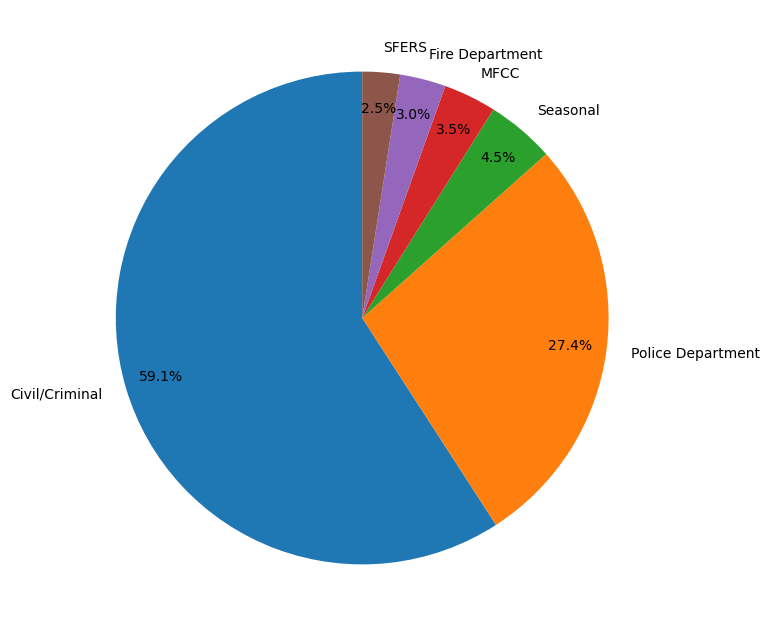

In [52]:
#pie charts to represent the proportion of employees in different departments

plt.figure(figsize=(8,8))
plt.pie(dept_counts, labels=dept_counts.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
ax.set_title('Proportion of Employees in Different Departments')
plt.show()

In [49]:
employee_cleaned.drop(columns=['department'])

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,StandardizedDepartment
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,28628.62,567595.43,567595.43,2011,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,28628.62,538909.28,538909.28,2011,San Francisco,Police Department
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,28628.62,335279.91,335279.91,2011,San Francisco,Police Department
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,28628.62,332343.61,332343.61,2011,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,28628.62,326373.19,326373.19,2011,San Francisco,Fire Department
...,...,...,...,...,...,...,...,...,...,...,...,...
148645,148646,Carolyn A Wilson,Human Services Technician,0.00,0.00,0.00,0.00,0.00,0.00,2014,San Francisco,NaN
148647,148648,Joann Anderson,Communications Dispatcher 2,0.00,0.00,0.00,0.00,0.00,0.00,2014,San Francisco,NaN
148648,148649,Leon Walker,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,San Francisco,NaN
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,San Francisco,NaN


# 5.Grouped Analysis

In [62]:
#Grouping data by the year attribute to understand how average salary varies over different years

grouped_data = employee_cleaned.groupby('Year')['TotalPay'].agg(['mean','median', 'std', 'min', 'max', 'count'])
grouped_data

,mean,median,std,min,max,count
Year,,,,,,
2011,71744.103871,68213.240,47498.706594,0.00,567595.43,36159
2012,74113.262265,70714.680,49523.904319,0.00,362844.66,36766
2013,77611.443142,74500.015,52854.774783,0.00,347102.32,37606
2014,75471.836912,72366.280,51694.645115,-618.13,471952.64,38119


Text(0.5, 1.0, 'Trend of Mean Salary Over Years')

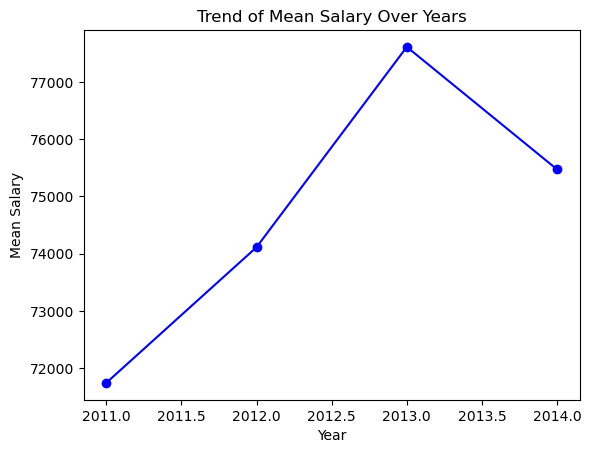

In [63]:
grouped_data['mean'].plot(kind='line', marker='o', color='blue', linestyle='-')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Mean Salary')
plt.title('Trend of Mean Salary Over Years')

# 6.Simple Correlation Analysis

Correlation between TotalPay and BasePay: 0.9546898576409023


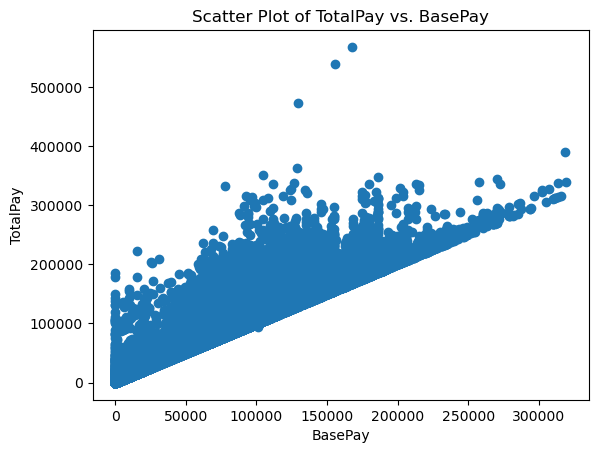

In [66]:
#we will get the correlation of Salary with the BasePay, then visualise the realation with a scatter plot

correlation = employee_cleaned['TotalPay'].corr(employee_cleaned['BasePay'])

print(f'Correlation between TotalPay and BasePay: {correlation}')

plt.scatter(employee_cleaned['BasePay'], employee_cleaned['TotalPay'])
plt.xlabel('BasePay')
plt.ylabel('TotalPay')
plt.title('Scatter Plot of TotalPay vs. BasePay')
plt.show()

Note: The Correlation of Salary and base pay suggests that: 
1.there is a very strong positive linear relationship between an employee's base salary ('BasePay') and their total compensation ('TotalPay').
2.Employees with higher base salaries tend to have higher total compensation, and the relationship is nearly perfectly linear